# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.




In [45]:
ll

total 626544
-rw-r--r-- 1 root 641568792 Mar 15 17:33 archive.zip
drwxr-xr-x 1 root      4096 Mar 15 15:41 sample_data/


In [48]:
!unzip -q ./archive.zip

In [49]:
ll

total 629604
-rw-r--r--  1 root 641568792 Mar 15 17:33 archive.zip
drwxr-xr-x  2 root      4096 Mar 15 17:34 meta/
drwxr-xr-x  2 root      4096 Mar 15 17:34 Meta/
-rw-r--r--  1 root      1033 Oct 13  2019 Meta.csv
drwxr-xr-x  1 root      4096 Mar 15 15:41 sample_data/
drwxr-xr-x  2 root    368640 Mar 15 17:34 test/
drwxr-xr-x  2 root    368640 Mar 15 17:34 Test/
-rw-r--r--  1 root    427897 Oct 13  2019 Test.csv
drwxr-xr-x 45 root      4096 Mar 15 17:35 train/
drwxr-xr-x 45 root      4096 Mar 15 17:34 Train/
-rw-r--r--  1 root   1940896 Oct 13  2019 Train.csv


### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

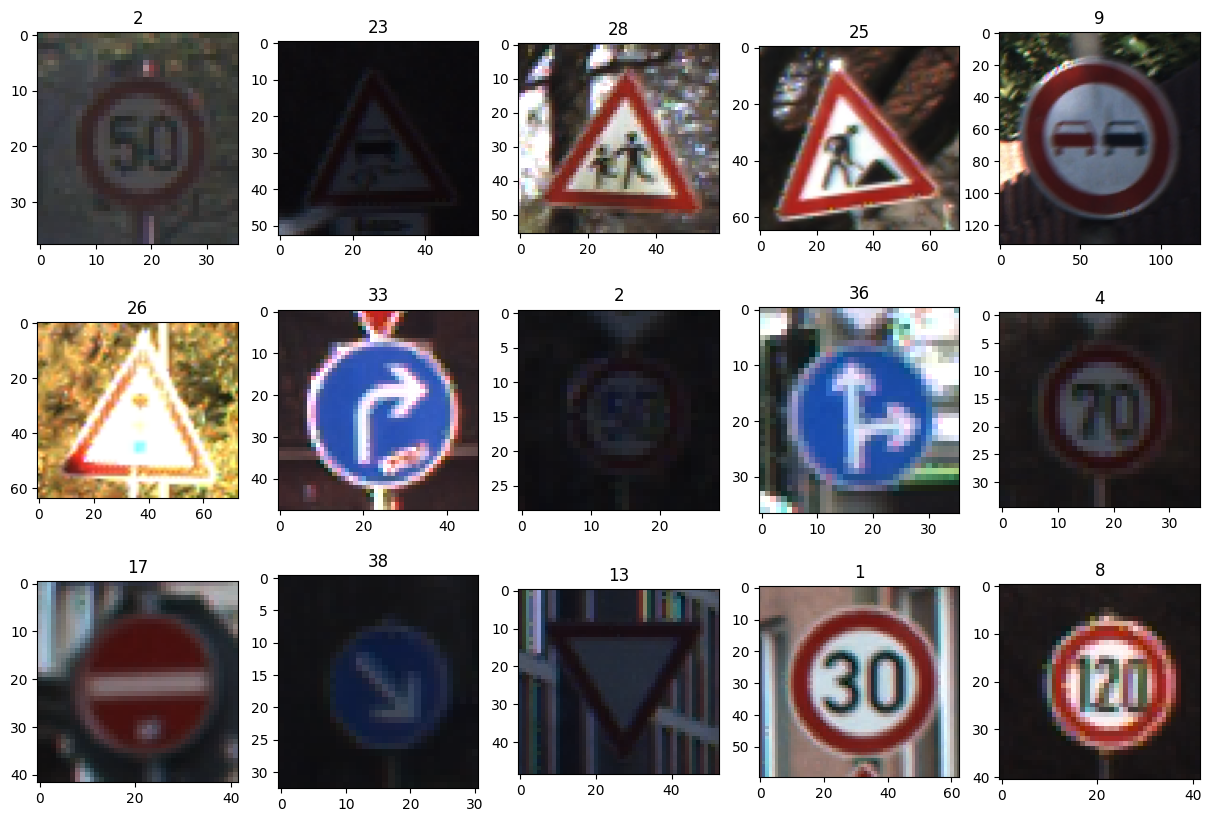

In [51]:
# Load the training labels
root = './' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [59]:
# Extract class identifiers
# Hint: Check the csv
ids = data.ClassId
print(ids)


0        20
1        20
2        20
3        20
4        20
         ..
39204    42
39205    42
39206    42
39207    42
39208    42
Name: ClassId, Length: 39209, dtype: int64


Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

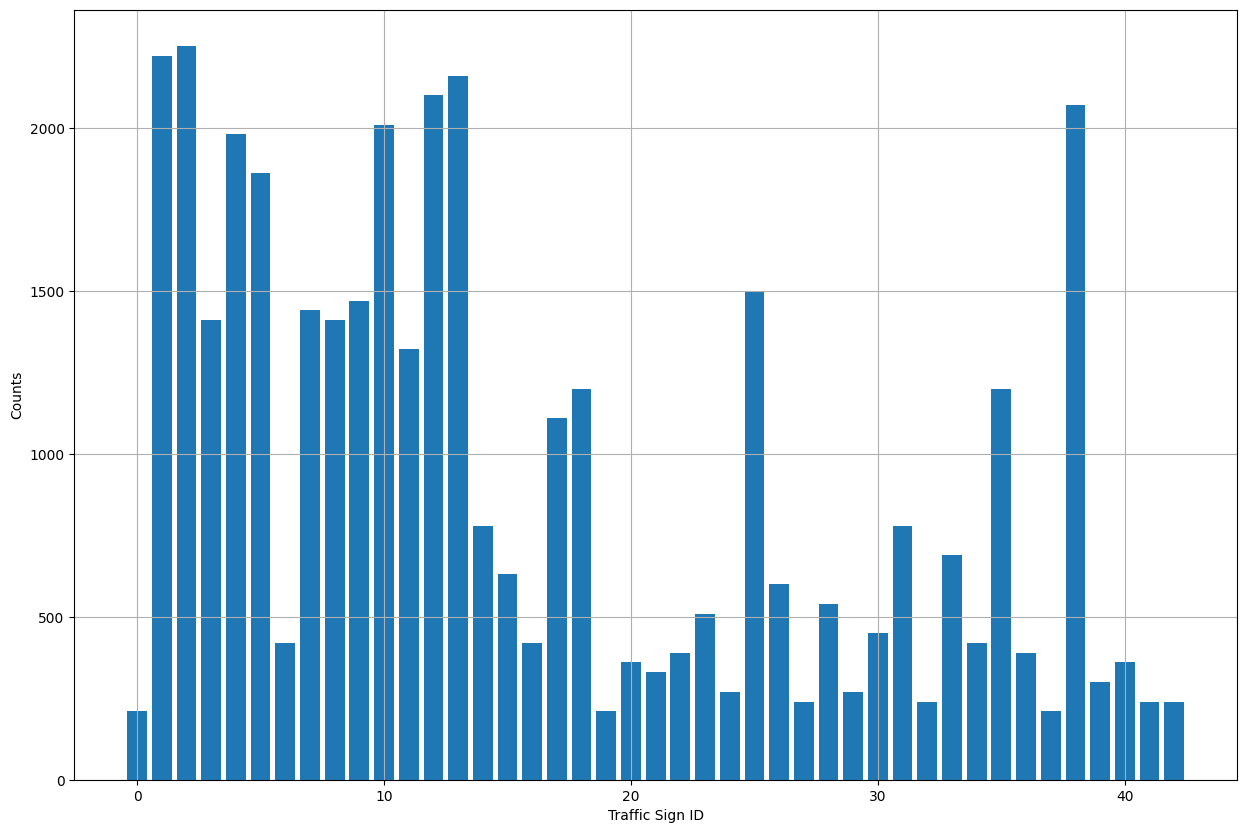

In [66]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

dict_keys([20, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
dict_values([360, 210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240])


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts proportion'))

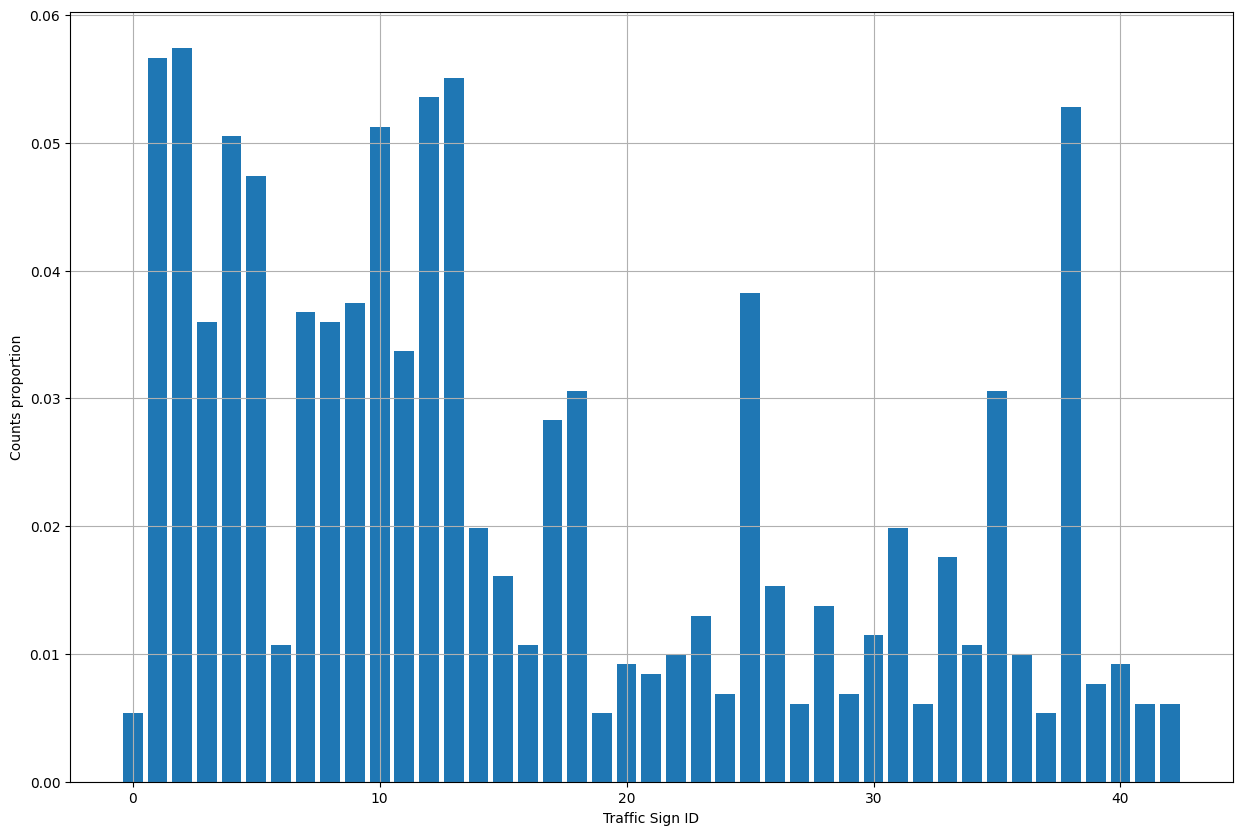

In [69]:
print(hist.keys())
print(hist.values())

prop = np.array(list(hist.values())) / np.sum(list(hist.values()))

plt.bar(hist.keys(), prop), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts proportion')


### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?


No. A perfectly balanced dataset would have equal proportions of samples of each class. But we see that the amount of data in the classes varies greatly by many times.


* Are there any classes that are (significantly) over-represented or under-represeneted?

Yes. Many of them.



### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?